# Robotics Project

Name : Abdallah Atef Hefny

ID : 201364

In [1]:
# import useful lib
import numpy as np
import time
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

# Forward Kinematics

In [2]:
# functions of forward kinematics
def FK(theta, alpha, a, d):
    #conversion of theta to radians
    theta = np.radians(theta)
    # cos and sin theta
    cth= np.cos(theta); sth= np.sin(theta)
    #conversion of alpha to radians 
    alpha= np.radians(alpha)
    # cos and sin alpha
    cal= np.cos(alpha); sal= np.sin(alpha)
    # This matrix is for DH transformation
    matrix = np.array([[cth,-sth*cal,sth*sal,a*cth] ,[sth,cth*cal,-sal*cth,a*sth] , [0,sal,cal,d] , [0,0,0,1]])
    return np.round(matrix,3)

# DH table

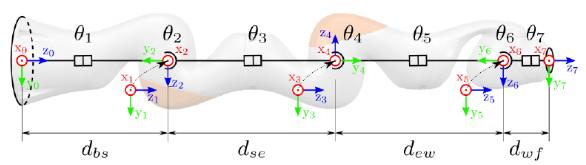

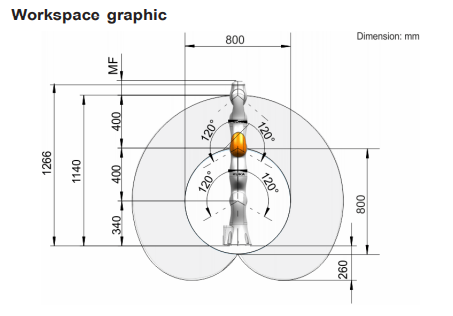


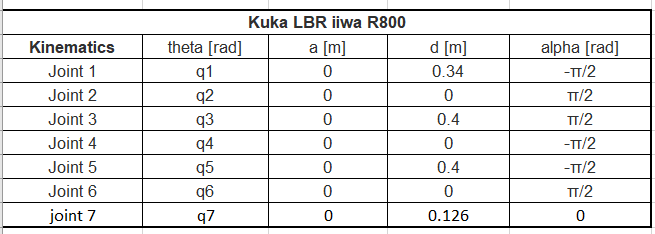

In [3]:
# Transformations of DH table
q = np.array([0,0,0,0,0,0,0])
for i in range(len(q)):
    q[i] = input("please enter the %s angle" %str(i+1))
print(q)
T1 = FK(q[0], -90, 0, 0.34)
T2 = FK(q[1], 90, 0, 0)
T3 = FK(q[2], 90, 0, 0.4)
T4 = FK(q[3], -90, 0, 0)
T5 = FK(q[4], -90, 0, 0.4)
T6 = FK(q[5], 90, 0, 0)
T7 = FK(q[6], 0, 0, 0.126)

T0_6 = np.round(T1@T2@T3@T4@T5@T6@T7,2)

print(T0_6)

please enter the 1 angle 10
please enter the 2 angle 20
please enter the 3 angle 80
please enter the 4 angle 90
please enter the 5 angle 100
please enter the 6 angle 50
please enter the 7 angle 20


[ 10  20  80  90 100  50  20]
[[-0.66  0.06 -0.75  0.04]
 [ 0.7  -0.32 -0.64 -0.46]
 [-0.28 -0.95  0.17  0.76]
 [ 0.    0.    0.    1.  ]]


In [4]:
client = RemoteAPIClient()
sim = client.require('sim')

defaultIdleFps = sim.getInt32Param(sim.intparam_idle_fps)
sim.setInt32Param(sim.intparam_idle_fps, 0)

1

In [6]:
#Getting names of joints 
joint_names = [f'joint_{i+1}' for i in range(7)]
#Handels of the joints
joint_handles=[sim.getObjectHandle(name) for name in joint_names]
#Assume that the EE is the connection of the last link with the end effector
EE_connection = sim.getObjectHandle("joint_7")
#Lets start
sim.addLog(sim.verbosity_scriptinfos, "Starting the program")

#Graph configuration

EE_graph = sim.getObjectHandle("graph")

EE_x = sim.addGraphStream(EE_graph,"End Effector X position","m",0,[0,1,1])
EE_y = sim.addGraphStream(EE_graph,"End Effector Y position","m",0,[0,0,1])
EE_z = sim.addGraphStream(EE_graph,"End Effector Z position","m",0,[0,1,0])

sim.addGraphCurve(EE_graph,"Position",3,[EE_x,EE_y,EE_z],[0,0,0],"m by m")

10000

In [7]:
# lets start the simulation
client.setStepping(False)
sim.startSimulation()
#enable the position control for all joints
for i in range(len(joint_handles)):
    sim.setObjectInt32Parameter(joint_handles[i],2001,~0)

for i in range(len(q)):
    sim.setJointTargetPosition(joint_handles[i],np.radians(q[i]))

In [9]:
Robotbase = joint_handles[0]
# position of the End Effector
EE_pos = sim.getObjectPosition(EE_connection,-1)
print("position of the end effector is \n",EE_pos)
# transformation matrix
EE_T = np.round(sim.getObjectMatrix(EE_connection,-1))
EE_T = EE_T.reshape(3,4)
print("Transformation matrix of the arm from vrep",EE_T)
print("Transformation matrix of the arm from the calculations",T0_6)

ret=sim.getGraphCurve(EE_graph,0 ,0)
sim.stopSimulation()

# Restore the original idle loop frequency:
sim.setInt32Param(sim.intparam_idle_fps, defaultIdleFps)
print('Program ended')

position of the end effector is 
 [0.10008204854321912, -0.6557897092586714, 0.7535083677998416]
Transformation matrix of the arm from vrep [[-1. -0. -1.  0.]
 [ 1. -0. -1. -1.]
 [ 0. -1.  0.  1.]]
Transformation matrix of the arm from the calculations [[-0.66  0.06 -0.75  0.04]
 [ 0.7  -0.32 -0.64 -0.46]
 [-0.28 -0.95  0.17  0.76]
 [ 0.    0.    0.    1.  ]]
Program ended
